In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
PyTorch version 2.0.1
Torchvision version 0.15.2
Numpy version 1.26.1
Pandas version 2.1.1


In [19]:
class LocationClass(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

**Create dataset**

In [20]:
dataset = LocationClass(
    data_dir='C:/Users/maxni/OneDrive/Desktop/Programming/Datasets/dataset_images_multiclass/seg_train'
)

In [21]:
len(dataset)

14034

0


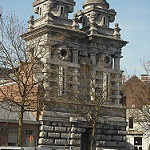

In [22]:
image, label = dataset[1000]
print(label)
image

In [23]:
data_dir = 'C:/Users/maxni/OneDrive/Desktop/Programming/Datasets/dataset_images_multiclass/seg_train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


In [24]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = LocationClass(data_dir, transform)

In [25]:
image, label = dataset[1000]
image.shape

torch.Size([3, 128, 128])

In [26]:
for image, label in dataset:
    break

**Dataloaders**

In [28]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [29]:
for images, labels in dataloader:
    break

In [30]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))